#Importing the necessary libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#Reading the dataset 

[Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data=pd.read_csv("/content/gdrive/MyDrive/S3/Mall_Customers.csv")

Mounted at /content/gdrive


In [3]:
print("Number of customers in the dataset are",len(data))
print("Shape of the data:",data.shape)

Number of customers in the dataset are 200
Shape of the data: (200, 5)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [8]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#Distribution of data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

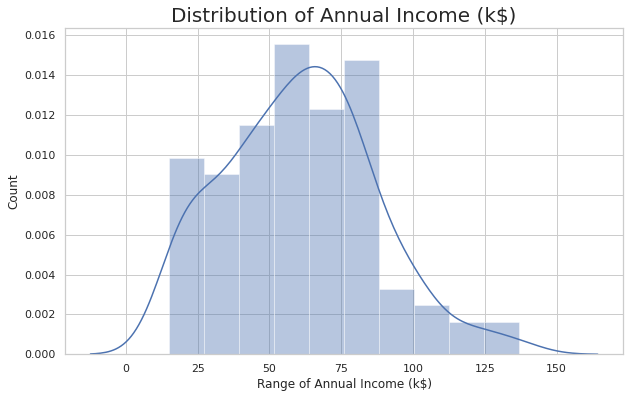

In [9]:
#Distribution of Annnual Income
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)',fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Most of the annual income falls between 50K to 85K.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

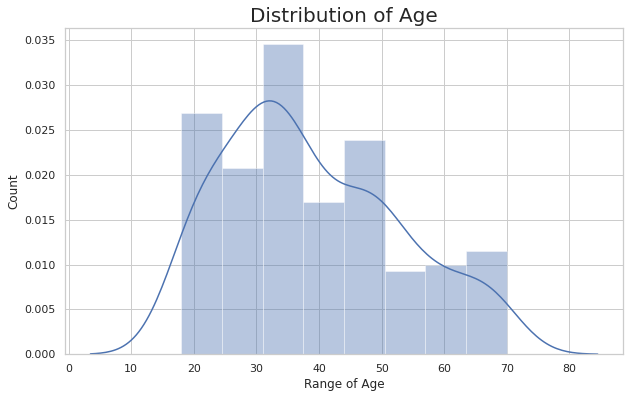

In [10]:
#Distribution of age
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age',fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

There are customers of a wide variety of ages.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

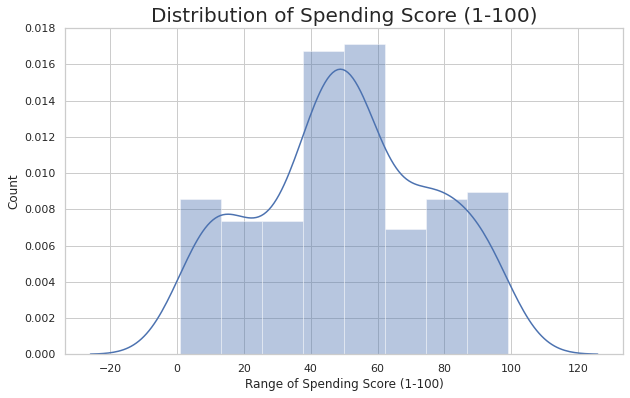

In [11]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)',fontsize=20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

The maximum spending score is in the range of 40 to 60.

#Gender Analysis

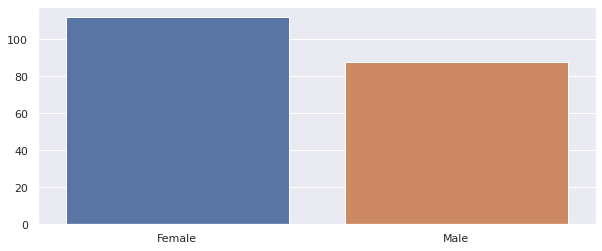

In [12]:
genders=data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

More female customers than male.

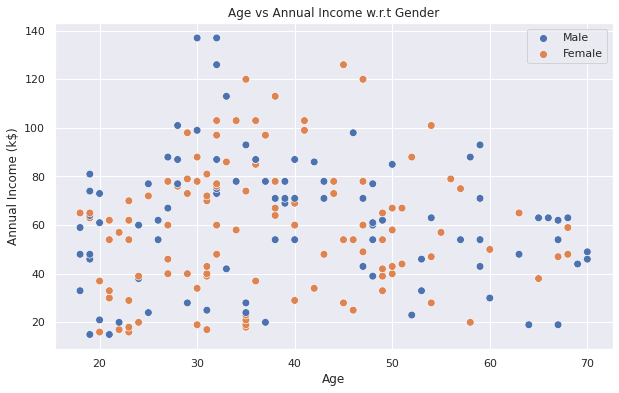

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',hue="Gender",data=data,s=60)
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

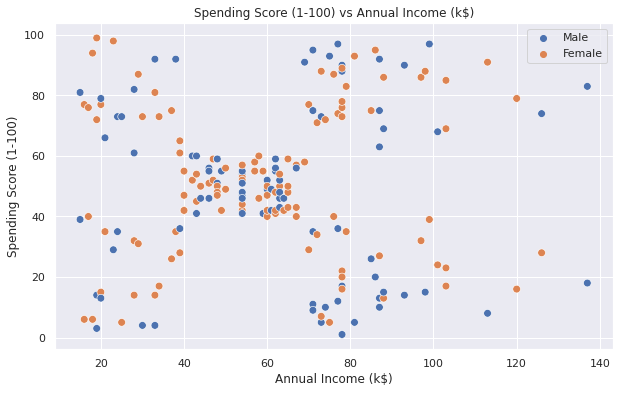

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue="Gender",data=data,s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

#Age Buckets

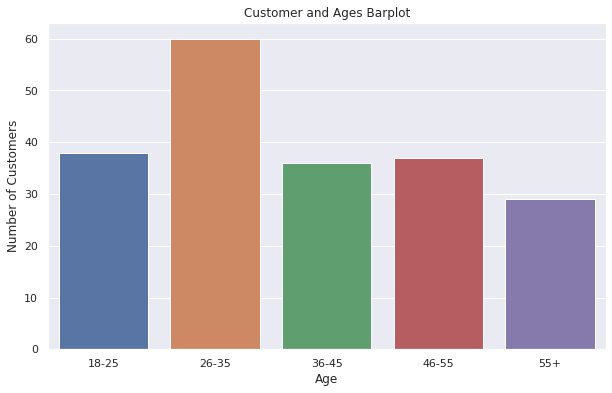

In [15]:
age18_25=data.Age[(data.Age<=25) & (data.Age>=18)]
age26_35=data.Age[(data.Age<=35) & (data.Age>=26)]
age36_45=data.Age[(data.Age<=45) & (data.Age>=36)]
age46_55=data.Age[(data.Age<=55) & (data.Age>=46)]
age55above=data.Age[data.Age>=56]
x=["18-25","26-35","36-45","46-55","55+"]
y=[len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
plt.figure(figsize=(10,6))
sns.barplot(x=x,y=y)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

#Spending Score Buckets

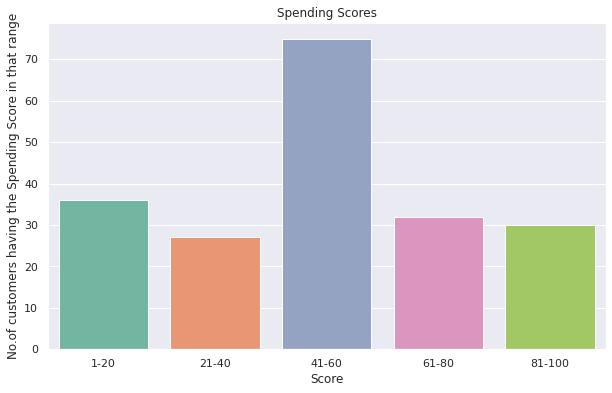

In [16]:
ss1_20=data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=1) & (data["Spending Score (1-100)"]<=20)]
ss21_40=data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=21) & (data["Spending Score (1-100)"]<=40)]
ss41_60=data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=41) & (data["Spending Score (1-100)"]<=60)]
ss61_80=data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=61) & (data["Spending Score (1-100)"]<=80)]
ss81_100=data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=81) & (data["Spending Score (1-100)"]<=100)]
score_x=["1-20","21-40","41-60","61-80","81-100"]
score_y=[len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
plt.figure(figsize=(10,6))
sns.barplot(x=score_x,y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("No.of customers having the Spending Score in that range")
plt.show()

#Annual Income Buckets

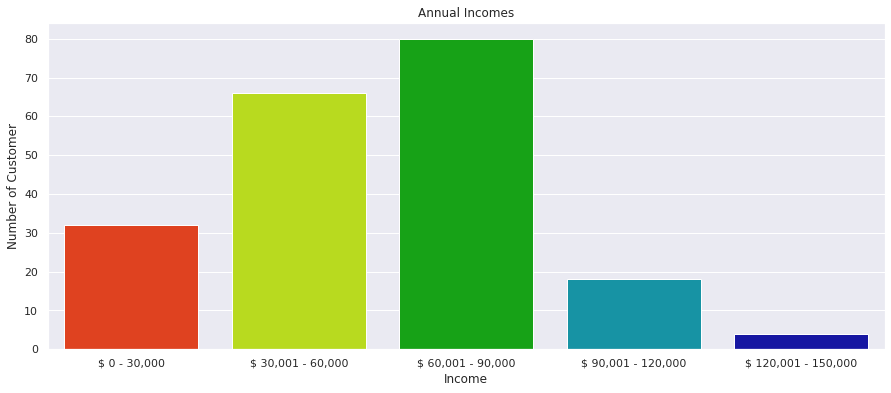

In [17]:
ai0_30=data["Annual Income (k$)"][(data["Annual Income (k$)"]>=0) & (data["Annual Income (k$)"]<=30)]
ai31_60=data["Annual Income (k$)"][(data["Annual Income (k$)"]>=31) & (data["Annual Income (k$)"]<=60)]
ai61_90=data["Annual Income (k$)"][(data["Annual Income (k$)"]>=61) & (data["Annual Income (k$)"]<=90)]
ai91_120=data["Annual Income (k$)"][(data["Annual Income (k$)"]>=91) & (data["Annual Income (k$)"]<=120)]
ai121_150=data["Annual Income (k$)"][(data["Annual Income (k$)"]>=121) & (data["Annual Income (k$)"]<=150)]
income_x=["$ 0 - 30,000","$ 30,001 - 60,000","$ 60,001 - 90,000","$ 90,001 - 120,000","$ 120,001 - 150,000"]
income_y=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

#Clustering based on 2 features

Working with Annual Income and Spending score features of the given data.

In [18]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


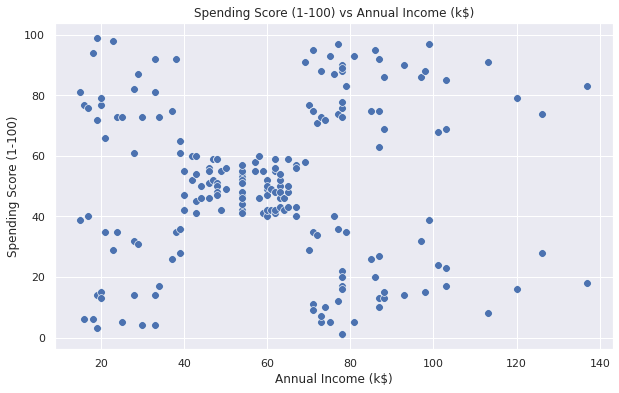

In [19]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y ='Spending Score (1-100)',data=X,s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [21]:
from sklearn.cluster import KMeans #Importing KMeans from sklearn

Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k to figure out the optimal number of clusters value. And then we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the given data.

WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.
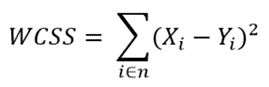

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

In [22]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

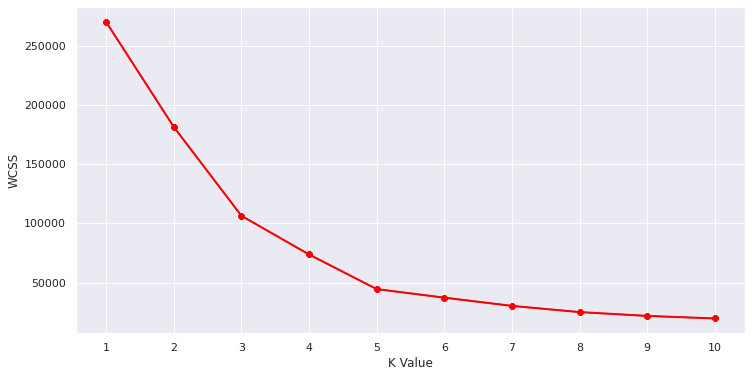

In [23]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

This is known as the elbow graph where the x-axis being the k values (number of clusters) and the y-axis being the WCSS values for each cluster value k. The number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. From the graph, we can see after 5 the drop is minimal. So, we can take 5 to be the number of clusters(k=5).

In [24]:
km1=KMeans(n_clusters=5) #Taking 5 clusters
km1.fit(X) #Fitting the input data
y=km1.predict(X) #predicting the labels of the input data
df1["label"]=y #adding the labels to a column named label
df1.head() #The new dataframe with the clustering is done

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


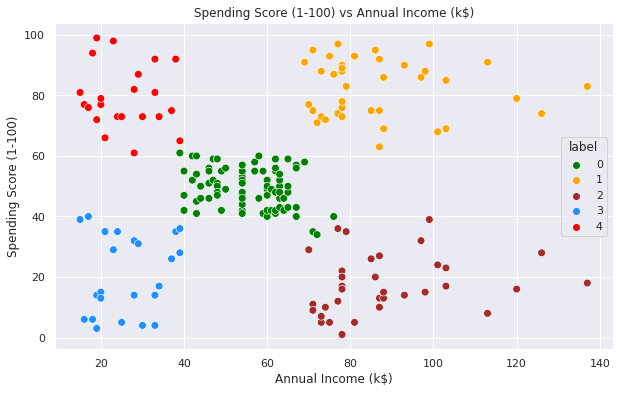

In [25]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue="label",palette=['green','orange','brown','dodgerblue','red'],legend='full',data=df1,s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

We can clearly see that 5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score. Similarly, the blue cluster is the customers with the most income and most spending score.

In [26]:
#Printing the customer ID's according to the groups
cust1=df1[df1["label"]==1]
print('Number of customers in 1st group are',len(cust1))
print('They are :',cust1["CustomerID"].values)
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group are',len(cust2))
print('They are :',cust2["CustomerID"].values)
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group are',len(cust3))
print('They are :',cust3["CustomerID"].values)
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group are',len(cust4))
print('They are :',cust4["CustomerID"].values)
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group are',len(cust5))
print('They are :',cust5["CustomerID"].values)

Number of customers in 1st group are 39
They are : [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
Number of customer in 2nd group are 35
They are : [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
Number of customer in 3rd group are 81
They are : [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
Number of customer in 4th group are 23
They are : [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
Number of customer in 5th group are 22
They are : [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30

#Clustering on the basis of 3D data

Working with Age, Annual Income and Spending score features of the given data.

In [27]:
df2=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
X2=df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Calculating the Within Cluster Sum of Squared Errors (WCSS) for different values of k.
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

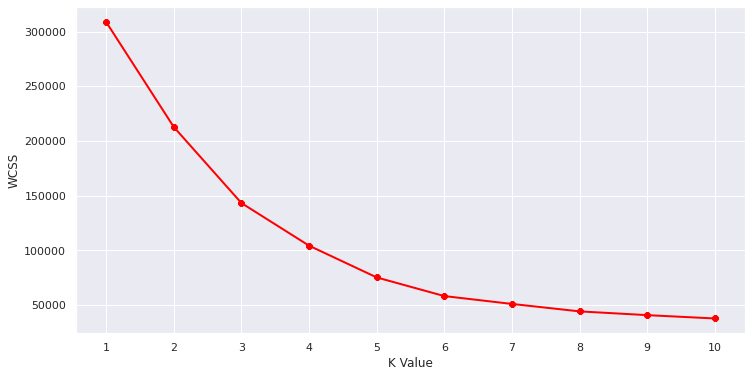

In [29]:
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [30]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df2["label"] = y2
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,9
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,9


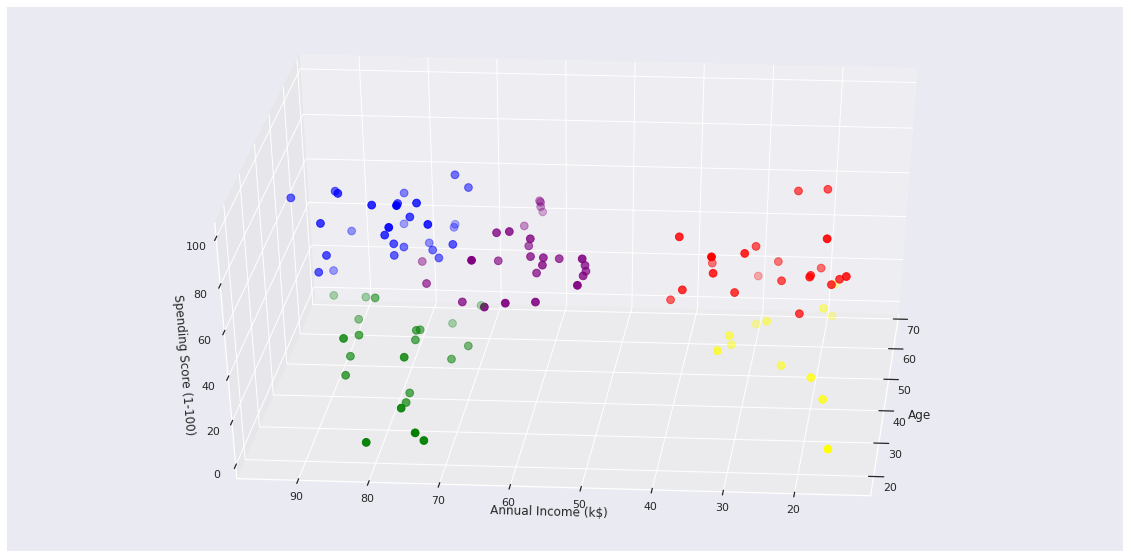

In [31]:
#Scatterplot of the clusters (3D plot)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [32]:
#Printing the customerID according to the groups.
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group are',len(cust1))
print('They are :',cust1["CustomerID"].values)
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group are',len(cust2))
print('They are :',cust2["CustomerID"].values)
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group are',len(cust3))
print('They are :',cust3["CustomerID"].values)
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group are',len(cust4))
print('They are :',cust4["CustomerID"].values)
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group are',len(cust5))
print('They are :',cust5["CustomerID"].values)

Number of customer in 1st group are 22
They are : [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
Number of customer in 2nd group are 29
They are : [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180]
Number of customer in 3rd group are 27
They are : [ 77  78  80  84  86  90  93  94  97  99 102 105 107 108 109 110 111 113
 117 118 119 120 122 123 127 147 161]
Number of customer in 4th group are 22
They are : [129 131 135 137 139 141 145 149 151 153 155 157 159 163 165 167 169 171
 173 175 177 179]
Number of customer in 5th group are 12
They are : [ 3  7  9 11 13 15 23 25 31 33 35 37]


Hence, Customer segmentation is done using K-Means clustering. K-Means is a good clustering algorithm. Almost all the clusters have similar density. It is also fast and efficient in terms of computational cost.